In [1]:
######################## Assignment:Gramener Case Study to identify patterns which indicate if a person is likely to default, #################################   

In [2]:
import numpy as np
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

sns.set(style="ticks", color_codes=True)


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading, Inspection & Cleaning

Import and read the database. Store it in a variable called loan.

In [4]:
loan=pandas.read_csv(r"C:/Users/Ranja/loan.csv", encoding = "ISO-8859-1")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
############### Metadata description ####################

### Description - The data given contains the information about past loan applicants and whether they ‘defaulted’ or not.###
### This dataset consists of 111 attributes/columns###
### This dataset consists of 39717 rows###
            
############### Metadata description ####################

In [6]:
loan.shape

(39717, 111)

In [7]:
loan.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000       4975.00000   
1      1077430    1314167       2500         2500       2500.00000   
2      1077175    1313524       2400         2400       2400.00000   
3      1076863    1277178      10000        10000      10000.00000   
4      1075358    1311748       3000         3000       3000.00000   
5      1075269    1311441       5000         5000       5000.00000   
6      1069639    1304742       7000         7000       7000.00000   
7      1072053    1288686       3000         3000       3000.00000   
8      1071795    1306957       5600         5600       5600.00000   
9      1071570    1306721       5375         5375       5350.00000   
10     1070078    1305201       6500         6500       6500.00000   
11     1069908    1305008      12000        12000      12000.00000   
12     1064687    1298717       9000         9000       

# Inspect Null values

In [8]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
5        58
6        57
7        57
8        58
9        57
10       57
11       58
12       57
13       57
14       58
15       58
16       57
17       57
18       56
19       58
20       57
21       57
22       57
23       58
24       58
25       58
26       58
27       56
28       57
29       57
         ..
39687    59
39688    61
39689    59
39690    59
39691    59
39692    60
39693    59
39694    59
39695    59
39696    59
39697    59
39698    59
39699    59
39700    60
39701    59
39702    59
39703    59
39704    60
39705    59
39706    60
39707    59
39708    59
39709    60
39710    60
39711    59
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [10]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Drop unecessary columns

In [11]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 25 Columns with NA values###
loan = loan.drop(['mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mort_acc',
                  'mths_since_recent_bc',
                  'mths_since_recent_bc_dlq',
                  'mths_since_recent_inq',
                  'mths_since_recent_revol_delinq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_sats',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_120dpd_2m',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'pct_tl_nvr_dlq',
                  'percent_bc_gt_75',
                  'tot_hi_cred_lim'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,0.0,0,NaN,0.0,0.0,NaN,NaN,NaN


In [12]:
loan.shape

(39717, 86)

In [13]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       6.19
emp_length                      2.71
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_d                         0.00
loan_status                     0.00
pymnt_plan                      0.00
url                             0.00
desc                           32.58
purpose                         0.00
title                           0.03
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_cr_line                0.00
i

In [14]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 25 Columns with NA values###
loan = loan.drop(['tot_coll_amt',
                  'tot_cur_bal',
                  'open_acc_6m',
                  'open_il_6m',
                  'open_il_12m',
                  'open_il_24m',
                  'mths_since_rcnt_il',
                  'total_bal_il',
                  'il_util',
                  'open_rv_12m',
                  'open_rv_24m',
                  'max_bal_bc',
                  'all_util',
                  'total_rev_hi_lim',
                  'inq_fi',
                  'total_cu_tl',
                  'inq_last_12m',
                  'acc_open_past_24mths',
                  'avg_cur_bal',
                  'bc_open_to_buy',
                  'bc_util',
                  'mo_sin_old_il_acct',
                  'total_bal_ex_mort',
                  'total_bc_limit',
                  'total_il_high_credit_limit'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1,INDIVIDUAL,NaN,NaN,NaN,0,0.0,0,0.0,0.0


In [15]:
loan.shape

(39717, 61)

In [16]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [17]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 4 Columns with NA values###
loan = loan.drop(['mths_since_last_major_derog',
                  'annual_inc_joint',
                  'dti_joint',
                  'verification_status_joint'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
loan.shape

(39717, 57)

In [19]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [20]:
# Use the 'drop()' function to drop the unnecessary columns 
### Dropped 4 Columns with NA values###
loan = loan.drop(['next_pymnt_d',
                  'mths_since_last_record',
                  'mths_since_last_delinq',
                  'desc'],
                   axis = 1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
loan.shape

(39717, 53)

# Inspecting the distributions of some important columns

In [22]:
loan.groupby('term').size()/len(loan.index)*100

term
 36 months    73.258302
 60 months    26.741698
dtype: float64

In [23]:
loan.groupby('home_ownership').size()/len(loan.index)*100

home_ownership
MORTGAGE    44.462069
NONE         0.007553
OTHER        0.246746
OWN          7.699474
RENT        47.584158
dtype: float64

In [24]:
loan.groupby('loan_status').size()/len(loan.index)*100

loan_status
Charged Off    14.167737
Current         2.870307
Fully Paid     82.961956
dtype: float64

In [25]:
loan.groupby('verification_status').size()/len(loan.index)*100

verification_status
Not Verified       42.603923
Source Verified    25.145404
Verified           32.250674
dtype: float64

In [26]:
loan.groupby('purpose').size()/len(loan.index)*100

purpose
car                    3.900093
credit_card           12.916383
debt_consolidation    46.934562
educational            0.818289
home_improvement       7.493013
house                  0.959287
major_purchase         5.506458
medical                1.744845
moving                 1.467885
other                 10.053629
renewable_energy       0.259335
small_business         4.602563
vacation               0.959287
wedding                2.384369
dtype: float64

In [27]:
loan.groupby('grade').size()/len(loan.index)*100

grade
A    25.392149
B    30.264119
C    20.389254
D    13.362036
E     7.155626
F     2.641186
G     0.795629
dtype: float64

### Crosschecking the Excel sheet

In [28]:
loan.to_csv(r"C:\Users\Ranja\Downloads\loan_Check1.csv",sep='\t', encoding='utf-8')

###  Creating Simple countplots

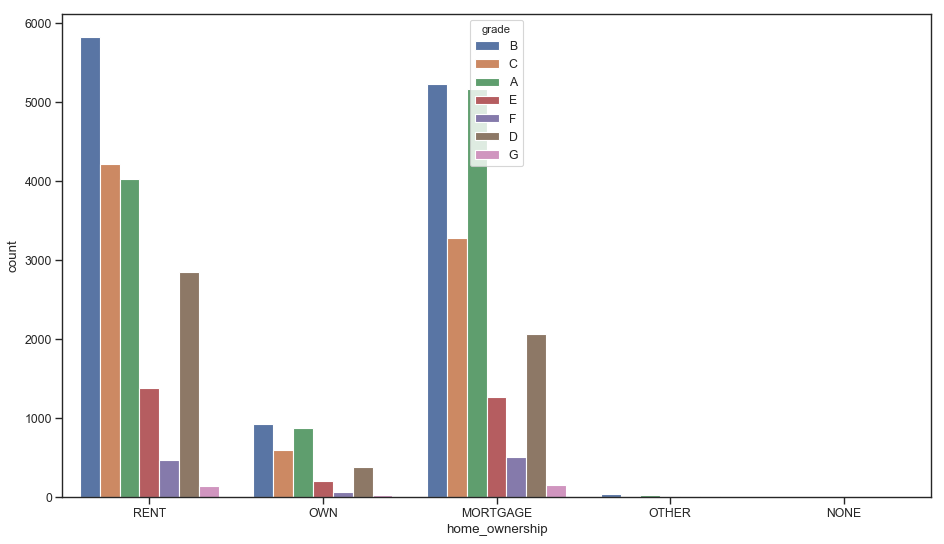

In [29]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "home_ownership", hue = "grade", data = loan)

In [33]:
#####Obeservation: Most loans of grade B are given to customers staying in a rented house#####
#####followed by customers owining a property######

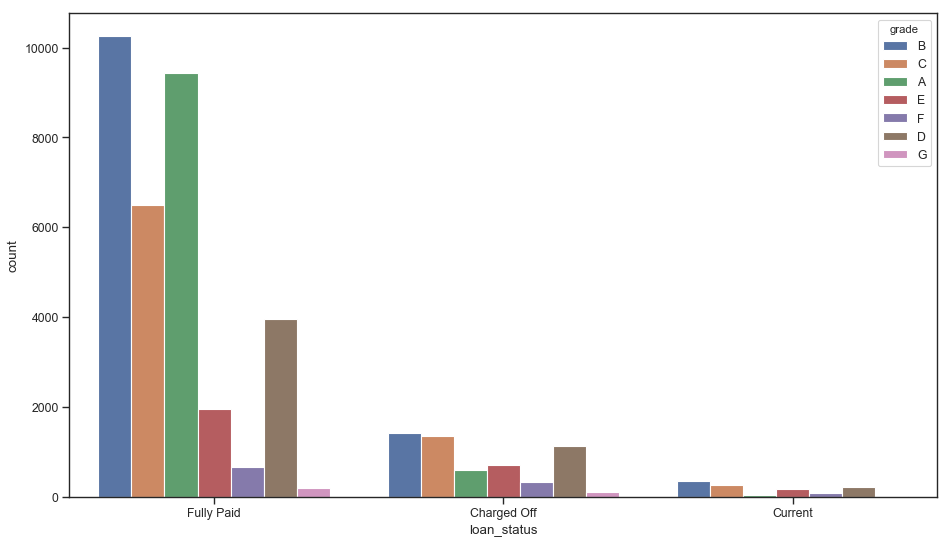

In [34]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "grade", data = loan)

In [35]:
##### Obeservation: Most loans of grade B are charged off #######

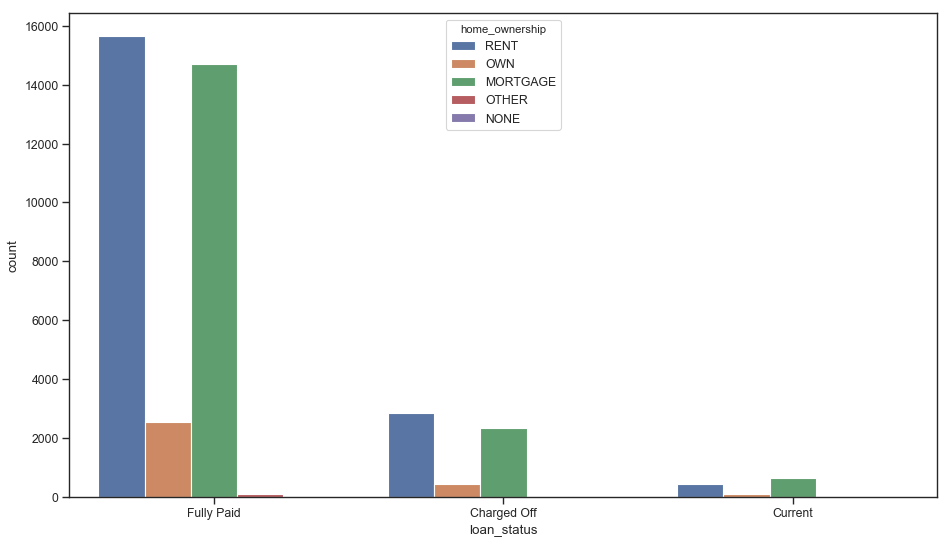

In [36]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "home_ownership", data = loan)

In [38]:
#####Obeservation: Most loans of customers staying in a rented house are charged off#####
#####followed by customers having a mortgage property######

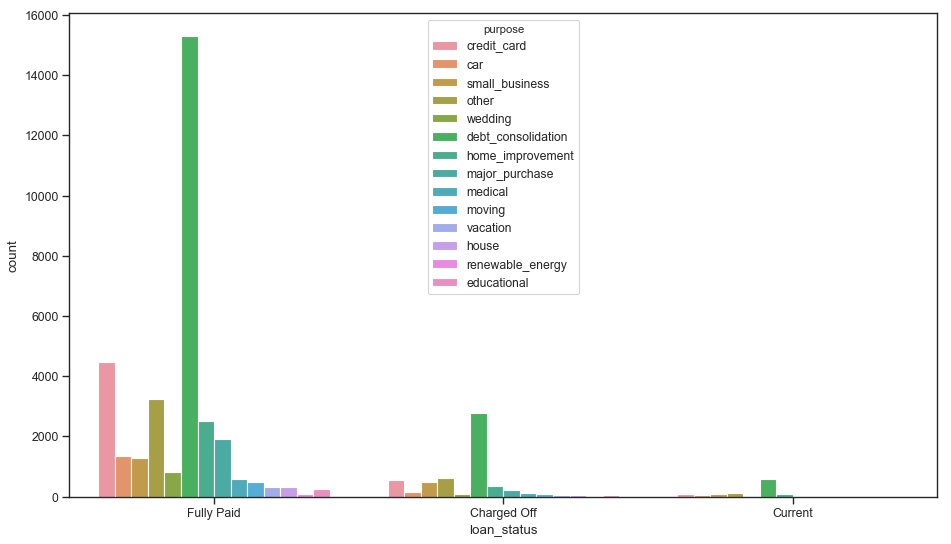

In [40]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "purpose", data = loan)

In [41]:
#####Obeservation: Most loans of customers under charged off are for debt consolidation#####


# Bucketing the annual salary 

In [42]:
def salary_bracket(x):
    'Dividing the salary into following categories'
    if x < 300001:
        return "Bracket_1"
    elif 300001 <= x < 400001:
        return "Bracket_2"    
    elif 400001 <= x < 600001:
        return "Bracket_3"    
    elif 600001 <= x < 800001:
        return "Bracket_4"
    elif 800001 <= x < 1000001:
        return "Bracket_5"
    else:
        return "Bracket_6"

In [43]:
loan['Annual_Sal'] = loan.annual_inc.apply(lambda x: salary_bracket(x))

In [44]:
loan.Annual_Sal.value_counts()

Bracket_1    39542
Bracket_2       83
Bracket_3       43
Bracket_4       27
Bracket_6       14
Bracket_5        8
Name: Annual_Sal, dtype: int64

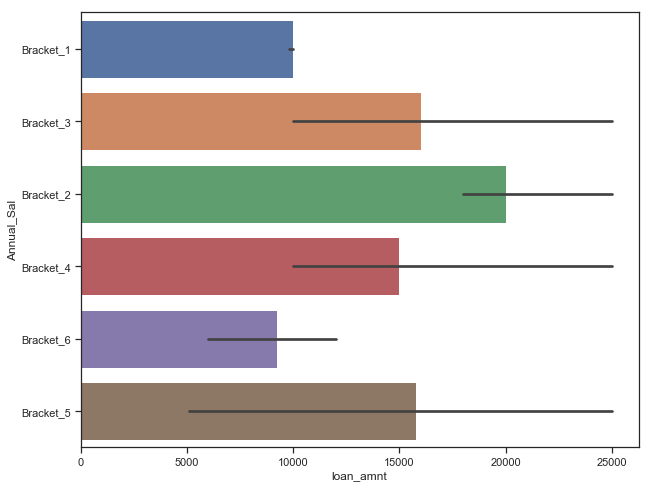

In [45]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Annual_Sal", data=loan, estimator=np.median)
plt.show()

In [97]:
#####Obeservation: Most loans of customers under bracket 2 have higher loan amount#####

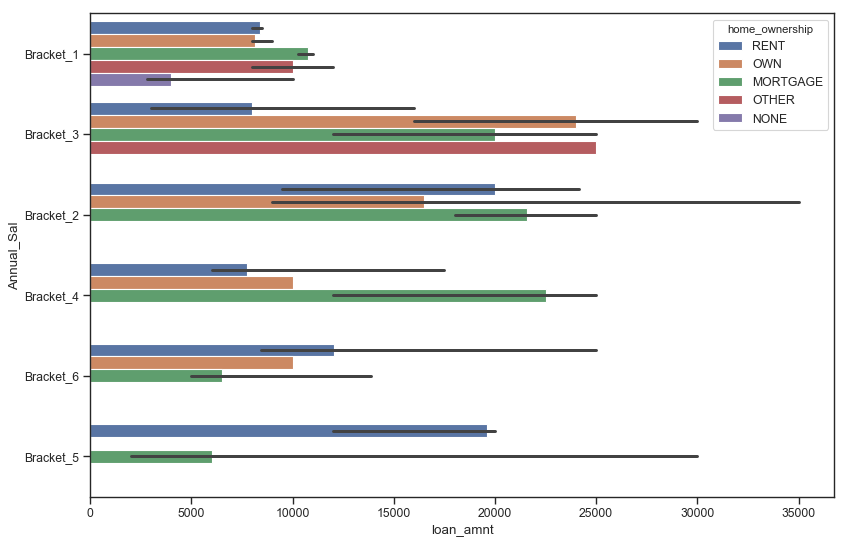

In [46]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='Annual_Sal', hue="home_ownership", data=loan, estimator=np.median)
plt.show()

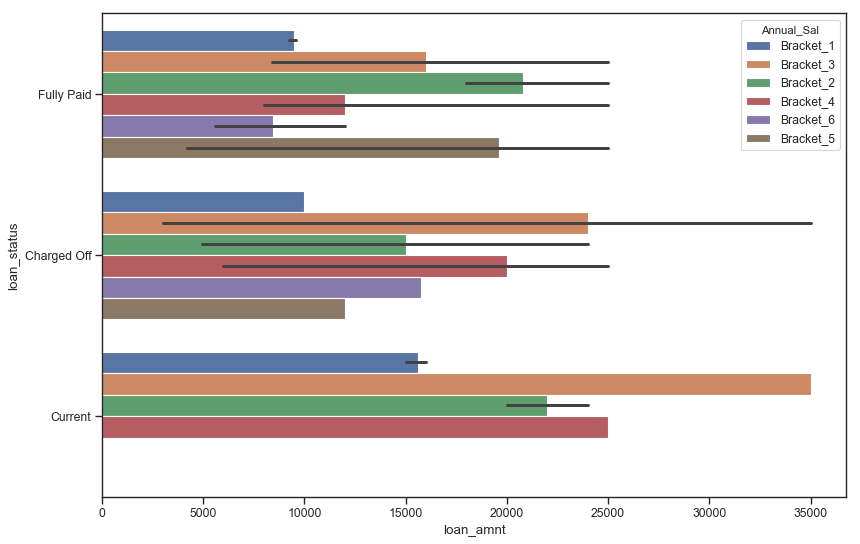

In [47]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='loan_amnt', y='loan_status', hue="Annual_Sal", data=loan, estimator=np.median)
plt.show()

# Bucketing the loan amount 

In [48]:
def Loan_amt_bracket(x):
    'Dividing the loan amount into following categories'
    if x < 5001:
        return "Loan_Bracket_1"
    elif 5001 <= x < 10001:
        return "Loan_Bracket_2"    
    elif 10001 <= x < 15001:
        return "Loan_Bracket_3"    
    elif 15001 <= x < 20001:
        return "Loan_Bracket_4"
    elif 20001 <= x < 30001:
        return "Loan_Bracket_5"
    else:
        return "Loan_racket_6"

In [49]:
loan['Loan_amt_bracket'] = loan.loan_amnt.apply(lambda x: Loan_amt_bracket(x))

In [50]:
loan.Loan_amt_bracket.value_counts()

Loan_Bracket_2    12960
Loan_Bracket_1     9568
Loan_Bracket_3     7986
Loan_Bracket_4     4591
Loan_Bracket_5     3784
Loan_racket_6       828
Name: Loan_amt_bracket, dtype: int64

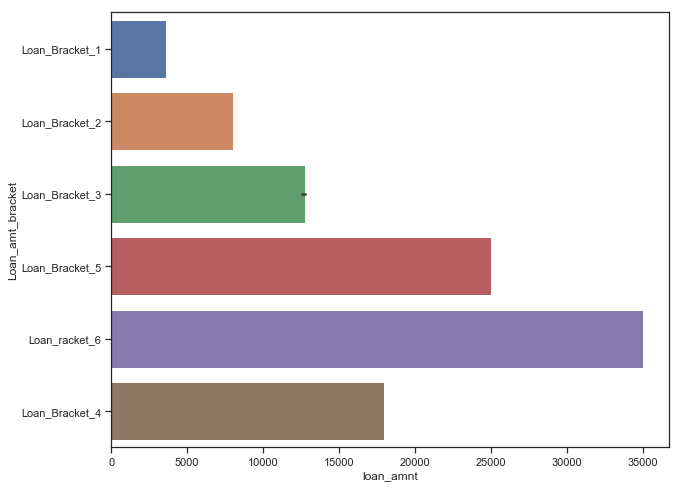

In [51]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Loan_amt_bracket", data=loan, estimator=np.median)
plt.show()

# Bucketing the int rate 

In [52]:
loan['int_rate']=loan['int_rate'].str.replace('%','',regex=True)

In [53]:
loan['int_rate']=loan['int_rate'].apply(pandas.to_numeric)

In [54]:
def Int_rate_bracket(x):
    'Dividing the Intrest rate into following categories'
    if x < 6:
        return "Int_Bracket_1"
    elif 6 <= x < 10:
        return "Int_Bracket_2"    
    elif 10 <= x < 14:
        return "Int_Bracket_3"    
    elif 14 <= x < 16:
        return "Int_Bracket_4"
    elif 16 <= x < 20:
        return "Int_Bracket_5"
    else:
        return "Int_racket_6"

In [55]:
loan['Int_amt_bracket'] = loan.int_rate.apply(lambda x: Int_rate_bracket(x))

In [56]:
loan.Int_amt_bracket.value_counts()

Int_Bracket_3    16296
Int_Bracket_2    10812
Int_Bracket_4     5315
Int_Bracket_5     5092
Int_Bracket_1     1330
Int_racket_6       872
Name: Int_amt_bracket, dtype: int64

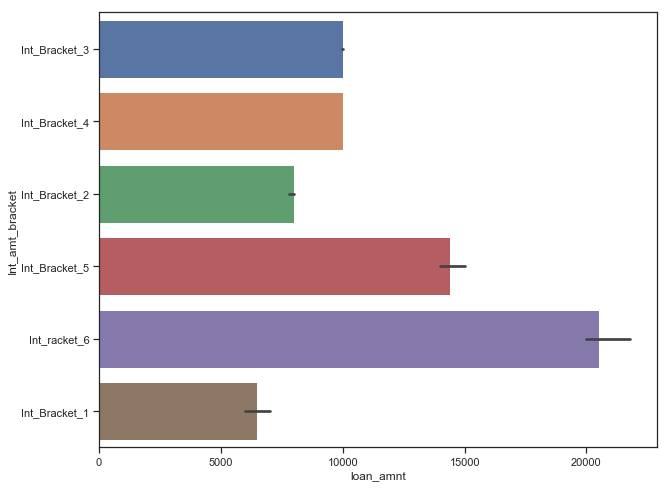

In [57]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Int_amt_bracket", data=loan, estimator=np.median)
plt.show()

# Bucketing the term

In [58]:
loan['term']=loan['term'].str.replace('months','',regex=True)

In [61]:
loan['term']=loan['term'].apply(pandas.to_numeric)

In [62]:
def Term_bracket(x):
    'divide the Term into following categories'
    if x < 37:
        return "Term_Bracket_1"
    else:
        return "Term_Bracket_2"

In [63]:
loan['Term_bracket'] = loan.term.apply(lambda x: Term_bracket(x))

In [64]:
loan.Term_bracket.value_counts()

Term_Bracket_1    29096
Term_Bracket_2    10621
Name: Term_bracket, dtype: int64

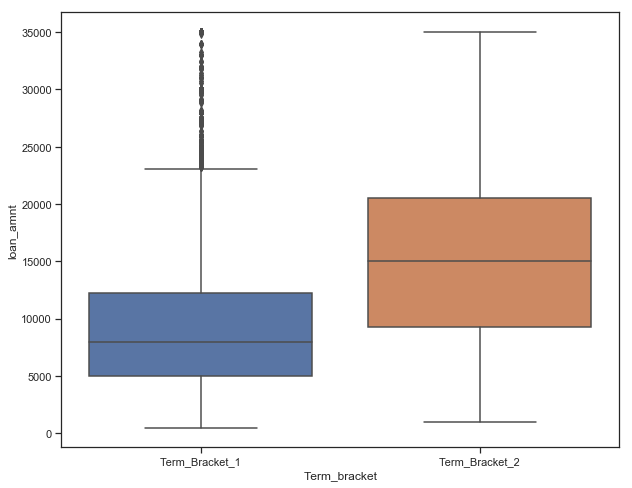

In [68]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Term_bracket', y='loan_amnt', data=loan)
plt.show()

# Bucketing the installements

In [69]:
loan['installment']=loan['installment'].apply(pandas.to_numeric)

In [70]:
def Installament_bracket(x):
    'Dividing Intrest rate into following categories'
    if x < 100:
        return "Install_1"
    elif 100 <= x < 200:
        return "Install_2"    
    elif 200 <= x < 300:
        return "Install_3"    
    elif 300 <= x < 400:
        return "Install_4"
    elif 400 <= x < 500:
        return "Install_5"
    elif 500 <= x < 600:
        return "Install_6"    
    elif 600 <= x < 700:
        return "Install_7"    
    elif 700 <= x < 800:
        return "Install_8"
    elif 800 <= x < 900:
        return "Install_9"
    else:
        return "Install_10"

In [71]:
loan['Installament_bracket'] = loan.installment.apply(lambda x: Installament_bracket(x))

In [72]:
loan.Installament_bracket.value_counts()

Install_2     9249
Install_3     7814
Install_4     7357
Install_5     4125
Install_1     4032
Install_6     2750
Install_7     1893
Install_9     1074
Install_8      879
Install_10     544
Name: Installament_bracket, dtype: int64

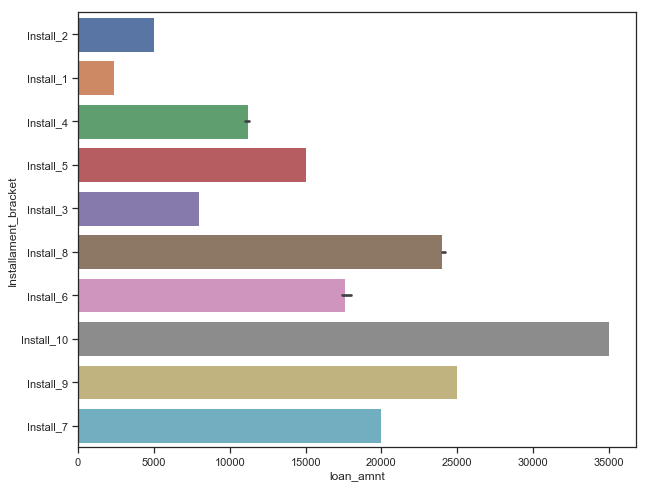

In [73]:
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_amnt', y="Installament_bracket", data=loan, estimator=np.median)
plt.show()

In [74]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal,Loan_amt_bracket,Int_amt_bracket,Term_bracket,Installament_bracket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_1,Install_2
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_2,Install_1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_1,Install_1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_2,Int_Bracket_3,Term_Bracket_1,Install_4
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_2,Install_1


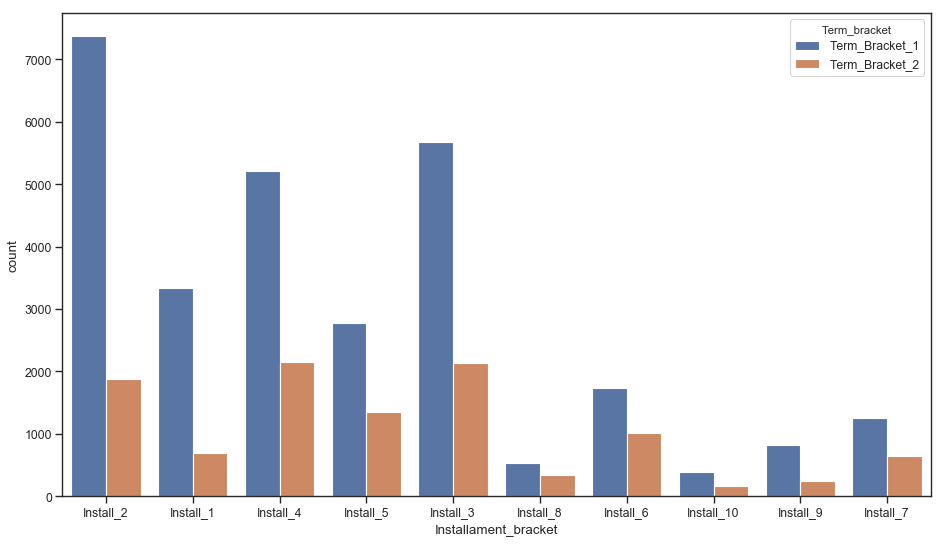

In [75]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "Installament_bracket", hue = "Term_bracket", data = loan)

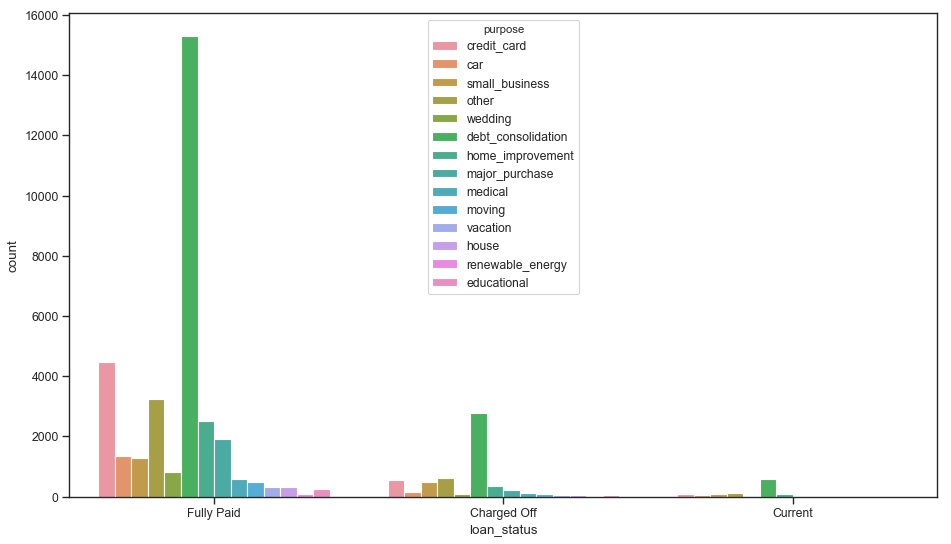

In [76]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x = "loan_status", hue = "purpose", data = loan)

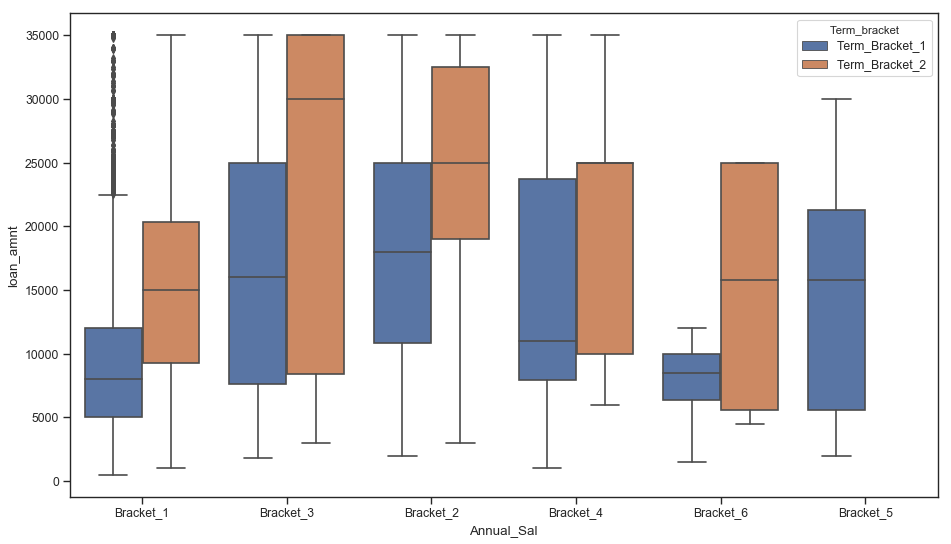

In [77]:

plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Annual_Sal', y='loan_amnt', hue='Term_bracket', data=loan)
plt.show()

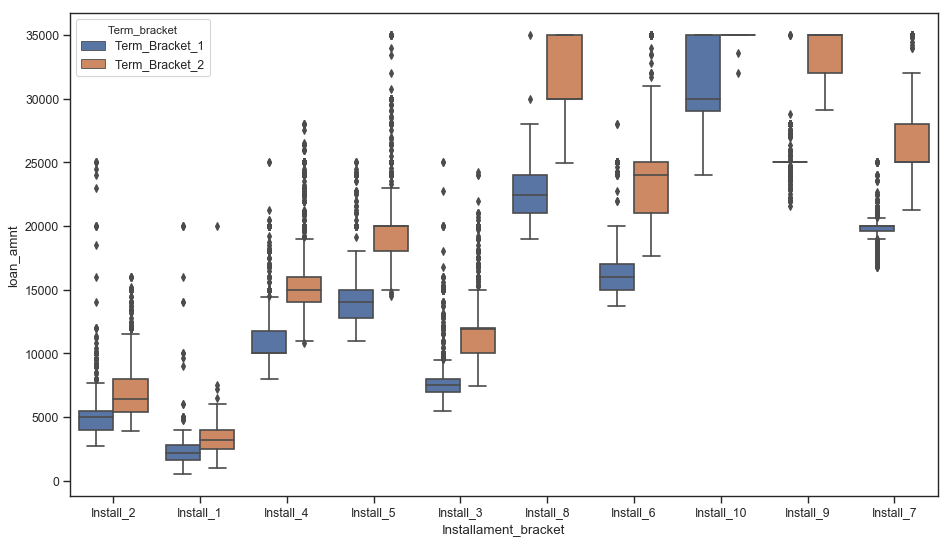

In [78]:
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='Installament_bracket', y='loan_amnt', hue='Term_bracket', data=loan)
plt.show()

In [79]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,Annual_Sal,Loan_amt_bracket,Int_amt_bracket,Term_bracket,Installament_bracket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_1,Install_2
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_2,Install_1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_4,Term_Bracket_1,Install_1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_2,Int_Bracket_3,Term_Bracket_1,Install_4
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,0.0,0,0.0,0.0,Bracket_1,Loan_Bracket_1,Int_Bracket_3,Term_Bracket_2,Install_1


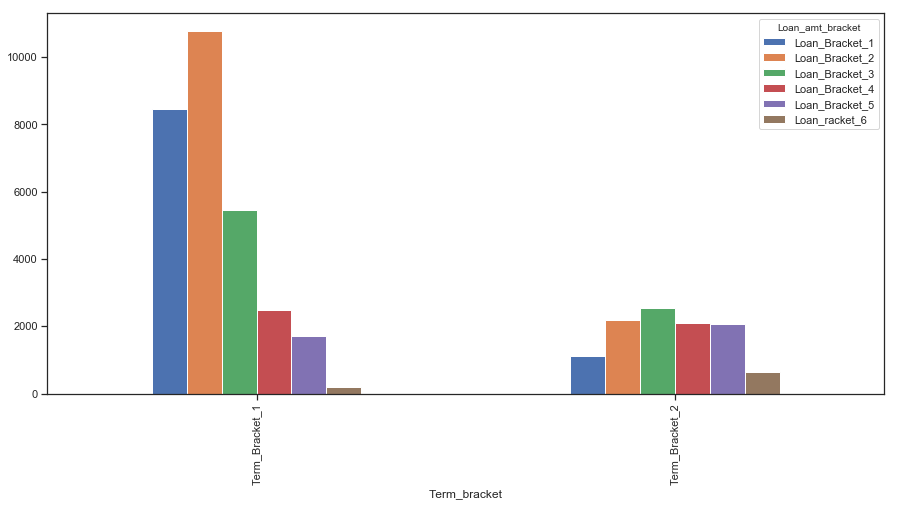

In [80]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['Term_bracket','Loan_amt_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar')

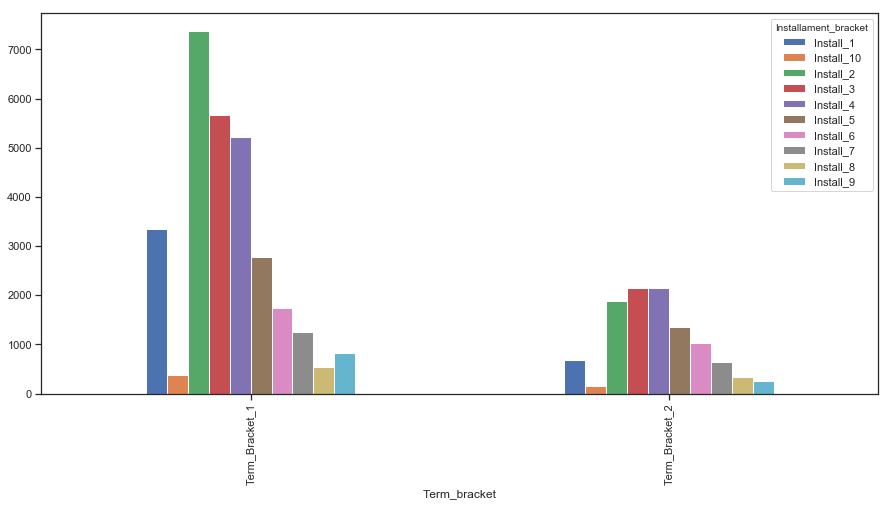

In [81]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['Term_bracket','Installament_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar')

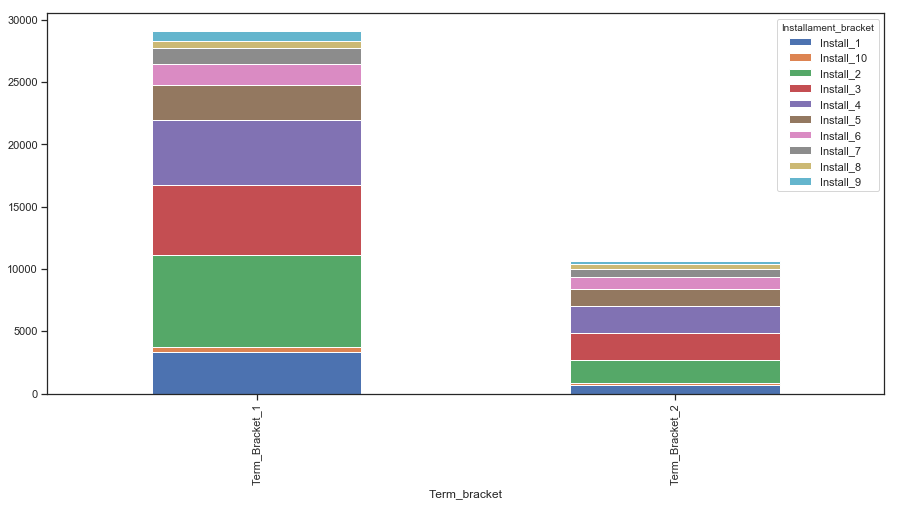

In [83]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
loan.groupby(['Term_bracket','Installament_bracket']).count()['Annual_Sal'].unstack().plot(ax=ax,kind='bar',stacked = True)

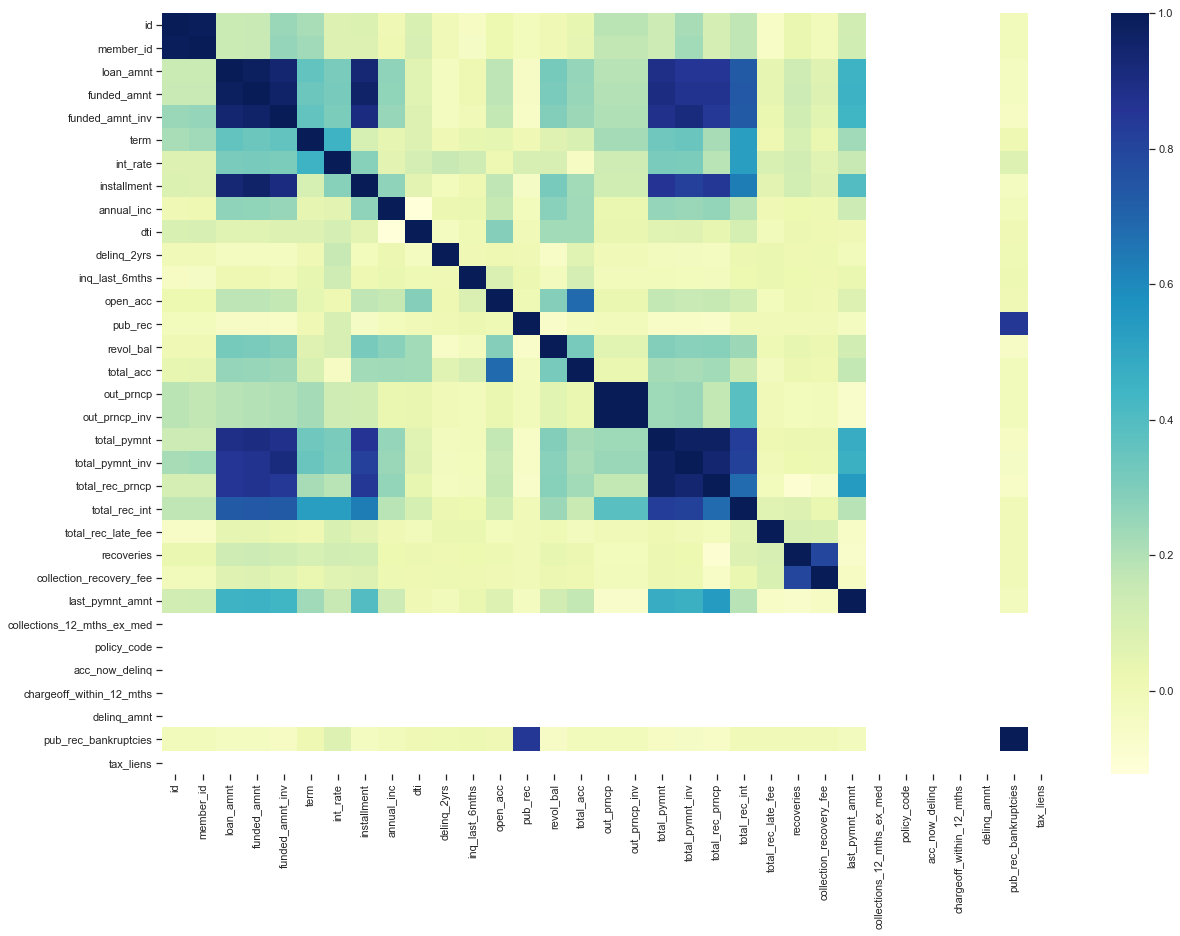

In [84]:
plt.figure(figsize=(20, 14))
sns.heatmap(loan.corr(),cmap="YlGnBu")

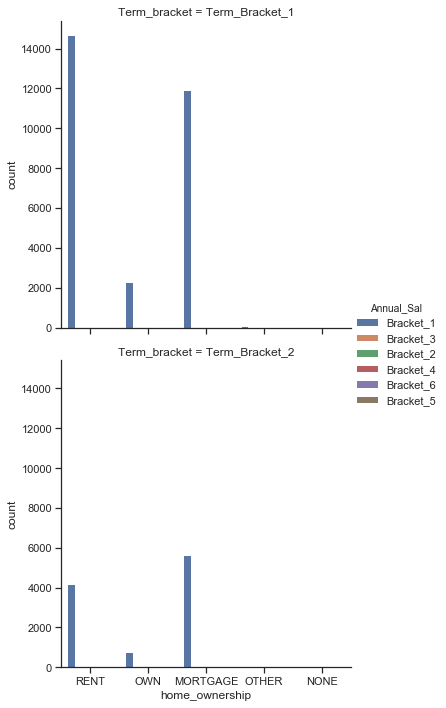

In [98]:
sns.factorplot(x = "home_ownership", hue = "Annual_Sal", row = "Term_bracket", data = loan, kind = "count")